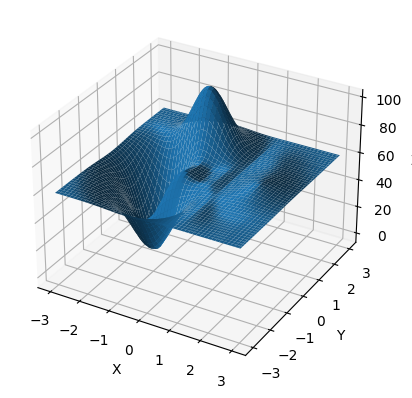

In [2]:
import numpy as np

def z_function(x, y):
    return 3*(1-x)**2*(np.exp(-x**2 - (y+1)**2) - 10*(x/5 - x**3 - y**5)*(np.exp(-x**2 - y**2)) - 1/3*(np.exp(-(x+1)**2-y**2)))+60
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la gama de valores de x e y
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)

# Crear una cuadrícula 2D de valores x e y
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Calcular los valores de z para cada punto de la cuadrícula
z_grid = z_function(x_grid, y_grid)
# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie 3D
ax.plot_surface(x_grid, y_grid, z_grid)

# Configurar las etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar la figura
plt.show()


In [143]:
import random
import math

# Definir la función a optimizar
def fitness_function(x, y):
    z = 3 * (1 - x) ** 2 * (math.exp(-x ** 2 - (y + 1) ** 2)) - 10 * (x / 5 - x ** 3 - y ** 5) * (math.exp(-x ** 2 - y ** 2)) - 1 / 3 * (math.exp(-(x + 1) ** 2 - y ** 2))
    return z+60

# Definir el algoritmo genético
def genetic_algorithm(population_size, num_generations, crossover_rate, mutation_rate):
    
    # Inicializar la población
    population = []
    for i in range(population_size):
        x = random.uniform(-3, 3)
        y = random.uniform(-3, 3)
        population.append((x, y))
    
    # Evaluar la población inicial
    fitness_scores = [fitness_function(x, y) for x, y in population]
    print(max(fitness_scores))
    
    # Encontrar la mejor solución de la población inicial
    best_fitness = max(fitness_scores)
    best_solution = population[fitness_scores.index(best_fitness)]
    print("Generación:", 0, "| Mejor solución:", best_solution, "| Fitness:", best_fitness)
    final_max_values=[best_fitness]
    final_min_values=[min(fitness_scores)]
    final_mean_values=[np.mean(fitness_scores)]
    generacion=[0]
    # Ejecutar las generaciones del algoritmo genético
    for i in range(num_generations):
        
        # Seleccionar padres con el método de ruleta
        fitness_sum = sum(fitness_scores)
        parent_indices = []
        for j in range(population_size):
            pick = random.uniform(0, fitness_sum)
            current_sum = 0
            for index, score in enumerate(fitness_scores):
                current_sum += score
                if current_sum > pick:
                    parent_indices.append(index)
                    break
        
        # Generar descendencia mediante cruce de un punto
        offspring = []
        for j in range(population_size // 2):
            parent1_index = parent_indices[2*j]
            parent2_index = parent_indices[2*j + 1]
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]
            if random.uniform(0, 1) < crossover_rate:
                crossover_point = random.randint(0, 1)
                offspring1 = (parent1[crossover_point], parent2[1-crossover_point])
                offspring2 = (parent2[crossover_point], parent1[1-crossover_point])
            else:
                offspring1 = parent1
                offspring2 = parent2
            offspring.append(offspring1)
            offspring.append(offspring2)
        
        # Mutar la descendencia con una mutación simple
        mutated_offspring = []
        for offspring in offspring:
            if random.uniform(0, 1) < mutation_rate:
                mutated_x = offspring[0] + random.uniform(-1, 1)
                mutated_y = offspring[1] + random.uniform(-1, 1)
                mutated_offspring.append((mutated_x, mutated_y))
            else:
                mutated_offspring.append(offspring)
        
        # Evaluar la descendencia mutada
        mutated_fitness_scores = [fitness_function(x, y) for x, y in mutated_offspring]
        
        # Reemplazar la población anterior con la descendencia mutada
        for j in range(population_size):
            if mutated_fitness_scores[j] > fitness_scores[j]:
                population[j] = mutated_offspring[j]
                fitness_scores[j] = mutated_fitness_scores[j]
        
        # Encontrar la mejor solución de la generación actual
        best_generation_fitness = max(fitness_scores)
        worst_generation_fitness=min(fitness_scores)
        mean_generation_fitness=np.mean(fitness_scores)
        best_generation_solution = population[fitness_scores.index(best_generation_fitness)]
        
        # Actualizar la mejor solución encontrada hasta el momento
        if best_generation_fitness > best_fitness:
            best_fitness = best_generation_fitness
            best_solution = best_generation_solution
        final_max_values.append(best_generation_fitness)
        final_min_values.append(worst_generation_fitness)
        final_mean_values.append(mean_generation_fitness)
        # Imprimir información de la generación actual
        print("Generación:", i+1, "| Mejor solución:", best_generation_solution, "| Fitness:", best_generation_fitness)
        generacion.append(i+1)
    return generacion, final_max_values,final_min_values,final_mean_values
    
    # Imprimir la mejor solución encontrada por el algoritmo genético
    print("La mejor solución encontrada es:", best_solution, "| Fitness:", best_fitness)

In [144]:
x,max_values,min_values,mean_values=genetic_algorithm(20, 100, 0.9, 0.04)

64.1410745496774
Generación: 0 | Mejor solución: (-0.7756564973337858, 1.481624334153687) | Fitness: 64.1410745496774
Generación: 1 | Mejor solución: (-0.1575120546652311, 1.481624334153687) | Fitness: 67.77440705649006
Generación: 2 | Mejor solución: (-0.1575120546652311, 1.481624334153687) | Fitness: 67.77440705649006
Generación: 3 | Mejor solución: (-0.1575120546652311, 1.481624334153687) | Fitness: 67.77440705649006
Generación: 4 | Mejor solución: (-0.1575120546652311, 1.481624334153687) | Fitness: 67.77440705649006
Generación: 5 | Mejor solución: (-0.1575120546652311, 1.481624334153687) | Fitness: 67.77440705649006
Generación: 6 | Mejor solución: (-0.1575120546652311, 1.481624334153687) | Fitness: 67.77440705649006
Generación: 7 | Mejor solución: (-0.1575120546652311, 1.481624334153687) | Fitness: 67.77440705649006
Generación: 8 | Mejor solución: (-0.1575120546652311, 1.481624334153687) | Fitness: 67.77440705649006
Generación: 9 | Mejor solución: (-0.1575120546652311, 1.4816243341

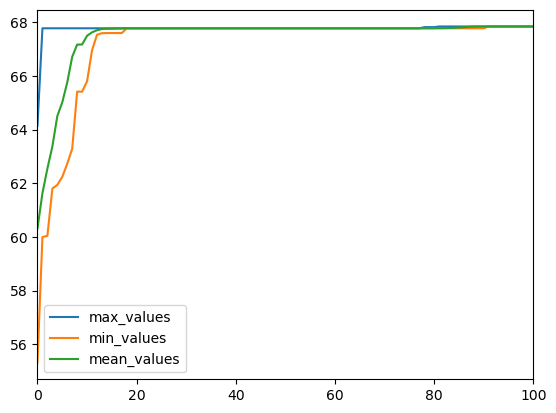

In [145]:
plt.plot(x,max_values,label="max_values")
plt.plot(x,min_values,label="min_values")
plt.plot(x,mean_values,label="mean_values")
plt.legend()
#plt.ylim(0,68.05)
plt.xlim(0,100)
plt.show()

In [146]:
genetic_algorithm(20, 20000, 0.9, 0.04)

63.47341802681632
Generación: 0 | Mejor solución: (-0.6155858479715524, 2.085772875045506) | Fitness: 63.47341802681632
Generación: 1 | Mejor solución: (0.35841832514171035, 1.6627804707932938) | Fitness: 67.02430221624353
Generación: 2 | Mejor solución: (0.35841832514171035, 1.5958592593155272) | Fitness: 67.11024599201019
Generación: 3 | Mejor solución: (0.35841832514171035, 1.5958592593155272) | Fitness: 67.11024599201019
Generación: 4 | Mejor solución: (0.35841832514171035, 1.5958592593155272) | Fitness: 67.11024599201019
Generación: 5 | Mejor solución: (-0.16187842634618654, 1.5958592593155272) | Fitness: 67.911725121702
Generación: 6 | Mejor solución: (-0.16187842634618654, 1.5958592593155272) | Fitness: 67.911725121702
Generación: 7 | Mejor solución: (-0.16187842634618654, 1.5958592593155272) | Fitness: 67.911725121702
Generación: 8 | Mejor solución: (-0.16187842634618654, 1.5958592593155272) | Fitness: 67.911725121702
Generación: 9 | Mejor solución: (-0.16187842634618654, 1.595

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [147]:
import math

def fitness_function(x, y):
    z = 3 * (1 - x) ** 2 * (math.exp(-x ** 2 - (y + 1) ** 2)) - 10 * (x / 5 - x ** 3 - y ** 5) * (math.exp(-x ** 2 - y ** 2)) - 1 / 3 * (math.exp(-(x + 1) ** 2 - y ** 2))
    return z


def maximize_function(fitness_function, x_range, y_range, step=0.005):
    max_z = float("-inf")
    max_x, max_y = None, None
    for x in [i * step for i in range(int(x_range[0] / step), int(x_range[1] / step))]:
        for y in [j * step for j in range(int(y_range[0] / step), int(y_range[1] / step))]:
            z = fitness_function(x, y)
            if z > max_z:
                max_z = z
                max_x, max_y = x, y
    return max_z, max_x, max_y

max_z, max_x, max_y = maximize_function(fitness_function, [-3, 3], [-3, 3])
print(f"El valor máximo de la función es {max_z:.2f} en x={max_x:.2f}, y={max_y:.2f}.")


El valor máximo de la función es 8.11 en x=-0.01, y=1.58.
